## Contexte

Lors des éléctions legislatives de 2024, une nouvelle assemblée nationale à été élu comprenant 577 députés de tout bords.\
Aux annonces des resultats, differents graphiques ont été diffusés.\
Parmis eux, on a retrouvé trois types de graphiques spécifique a ce type d'éléction:


### Type de graphique

#### Graphique en barre unique

<img src="barchart.png" alt="drawing" width="800"/>

#### Graphique en "demi" camembert

<img src="halfpie.png" alt="drawing" width="600"/>

#### Graphique de points en "demi" cercle

<img src="halfscatterpie.png" alt="drawing" width="600"/>

### Objectifs

Mon objectif sera d'ecrire des fonctions qui pourront reproduire ces differents graphiques pour n'importe quelles resultats d'éléction.<br/>
Nous utiliserons des données provenant des éléctions législatives françaises de 2022, dans l'objectif de representer les resultats de ces elections.<br/>
Puis nous appliquerons notre code et utiliseront nos recherches pour reproduire les graphiques ci-dessus pour les éléctions législatives françaises de 2024 en généralisant nos resultats.<br/>
Enfin, nous généraliserons encore notre code pour reproduire ces schema pour d'autres resultat d'éléctions, comme les elections européennes de 2024, des années précédentes, ou l'éléction du parlement d'autres pays.

### Methode

Pour cela, nous utiliserons les outils fourni par `pandas` pour stocker nos données avec un dataframe.<br />
De plus, nous travaillerons avec `matplolib.pyplot` pour representer une version de chaque graphique. Puis nous utiliserons `seaborn` pour completer le travailer réalisé sous `matplotlib` et rendre nos graphique plus attractifs.

## Importation de package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random as rnd
from mpl_toolkits import mplot3d
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

## Définition de fonctions utiles

In [2]:
def slice(string, n=10):
    """
    Function slicing any str chain with at least one character

    Parameters
    ---
    string: str
        String you want to slice
    n: int, default=10
        Max result string length

    Returns
    ---
    str:
        Original string, with a max length of n caracters, ending with '..' if it was sliced
    """
    end = ''
    if len(string) > n:
        end = '..'
    return string[0: min(len(string), n)] + end

## Etape 1 : Importation des données

In [3]:
## Importation des données sur les députés de la précédentes legislature
data = pd.read_xml('https://www.nosdeputes.fr/deputes/xml')

## Créons un premier dataframe 'Data_now' global
## Exclusion des députés ayant arreté en cours de mandat
data_now = data.loc[data['mandat_fin'] == '2024-06-09', :]
## Suppression des informations inutiles et trie
data_now = data_now[['id', 'nom', 'nom_de_famille', 'prenom', 'sexe', 'groupe_sigle', 'parti_ratt_financier']]
data_now = data_now.sort_values('groupe_sigle').reset_index()

## Créons un deuxième DataFrame qui nous donnera le count de chaque groupe
datagroup = data_now.value_counts('groupe_sigle', sort=False) 

## Associons le nom de chaque parti à son Sigle
name = {}
## Pour chaque Sigle unique, trouvons le partie de ratachement financé et assoçions le
for i in datagroup.index:
    name[i] = slice(data_now.loc[data_now['groupe_sigle']==i, :].reset_index().loc[0, 'parti_ratt_financier'], n=20)
datagroup = pd.merge(datagroup, pd.DataFrame.from_dict(name, orient='index'), left_index=True, right_index=True).rename(columns={0: 'groupe_name'})

## Affichage des données des deux DataFrames
print(datagroup) 
data_now.head(3)

              count             groupe_name
groupe_sigle                               
ECO              21  Europe Écologie Les ..
GDR              22  Parti communiste fra..
HOR              31                Ensemble
LFI              75     La France Insoumise
LIOT             22  Union des démocrates..
LR               61        Les Républicains
MODEM            50                Ensemble
NI                7  Europe Écologie Les ..
REN             169                Ensemble
RN               88  Rassemblement nation..
SOC              31        Parti socialiste


,index,id,nom,nom_de_famille,prenom,sexe,groupe_sigle,parti_ratt_financier
0,431,432,Nicolas Thierry,Thierry,Nicolas,H,ECO,Europe Écologie Les Verts
1,41,42,Jérémie Iordanoff,Iordanoff,Jérémie,H,ECO,Europe Écologie Les Verts
2,358,359,Delphine Batho,Batho,Delphine,F,ECO,Europe Écologie Les Verts


## Etape 2 : Realisation d'un premier graphique pour chaque situation

### Graphique en barre unique

In [4]:
## Définiton de la fonction Plotbar
def plotbar(data, column='count', groupe_name='groupe_name'):
    """
    Plot a barplot showing each group proportionnal results

    Parameters
    ---
    data: pandas.DataFrame
        DataFrame you want to plot
    column: str, default='count'
        column of data with the count of each group
    groupe_name: str, default='count'
        column of data with your group names
    """
    ## Initialisation
    vali = 0
    plt.figure(figsize=(10,1))

    ## Pour chaque valeur indéxé, on trace une barre representant la proportion de places d'un groupe
    for i in data.index: 
        di = data.loc[i, column]/data[column].sum()*100
        plt.barh(0, di, 1, left = vali, label=data.loc[i, groupe_name])
        plt.text(vali + 1/2*di, 0, f'{i}\n{np.round(di,2)}%', rotation=90,
                va='center', ha='center')
        vali += di

    ## Mise en forme et légende
    plt.legend(loc = [1.1, -0.2])
    plt.title("Representation de l'assemblé nationale au 9 juin 2024 en France")
    plt.box(False)
    plt.yticks([0])
    plt.grid(alpha = 0.5, c='white', ls='--', lw='2', axis='x')

    ## Affichage
    plt.show()

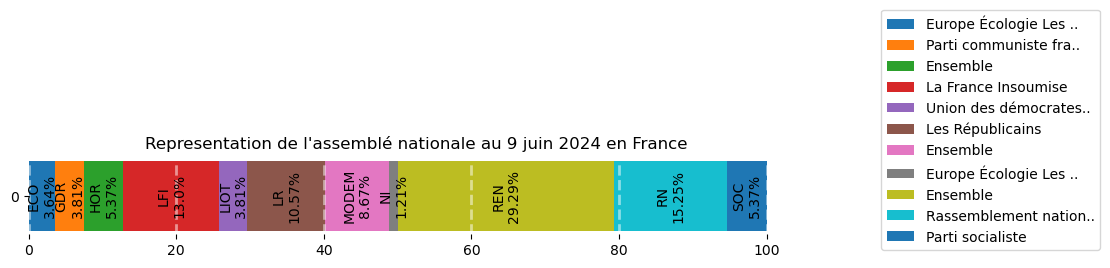

In [5]:
## Utilisation de notre fonction sur le DataFrame 'datagroup'
plotbar(datagroup)

### Graphique en "demi" camembert

In [6]:
## Définition de la fonction
def plot_halfpie(data, column='count', groupe_name='groupe_name'):
    """
    Plot a half pie chart (or half donut chart) showing each group proportionnal results

    Parameters
    ---
    data: pandas.DataFrame
        DataFrame you want to plot
    column: str, default='count'
        column of data with the count of each group
    groupe_name: str, default='count'
        column of data with your group names
    """
    ## Initialisation du graphique
    fig, ax= plt.subplots(figsize=(8,8))

    ## Importation des données du DataFrame
    val = list(data[column])
    names = list(data[groupe_name])
    labels = list(data.index) + ['']
    val.append(sum(val))

    ## Créaction d'une fonction qui retournera le double d'un pourcentage avec la valeur d'entrée
    def custom_autopct(pct):
        total = sum(val)
        value = int(np.round(pct * total / 100.0))
        return '{:.1f}% \n({:d})'.format(2*pct, value)
    ## Création du graphique
    ax.pie(val,
           labels=labels,
           labeldistance=0.8,
           radius = 1.5,
           autopct=custom_autopct,
           textprops={'fontsize': 9, 'va':'center', 'ha':'center'},
           pctdistance= 1.1,
           explode = [0.05 for i in range(len(val)-1)] + [0])
    
    ## Ajuster les limites de l'axe pour afficher nos masques correctement
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    plt.box(False)

    ## Création de deux masques 'circle' (esthetique) et 'rectangle' (pratique) 
    rectangle = plt.Rectangle((-2, 0), 4, -4, color='white')
    circle = plt.Circle((0, 0), 0.6, color='white')
    ax.add_patch(circle)
    ax.add_patch(rectangle)

    ## Affichage des noms
    plt.legend(names, loc=(1.2,0.5))
    plt.title("Representation de l'assemblé nationale au 9 juin 2024 en France")

    ## Affichage du resultat
    plt.show()

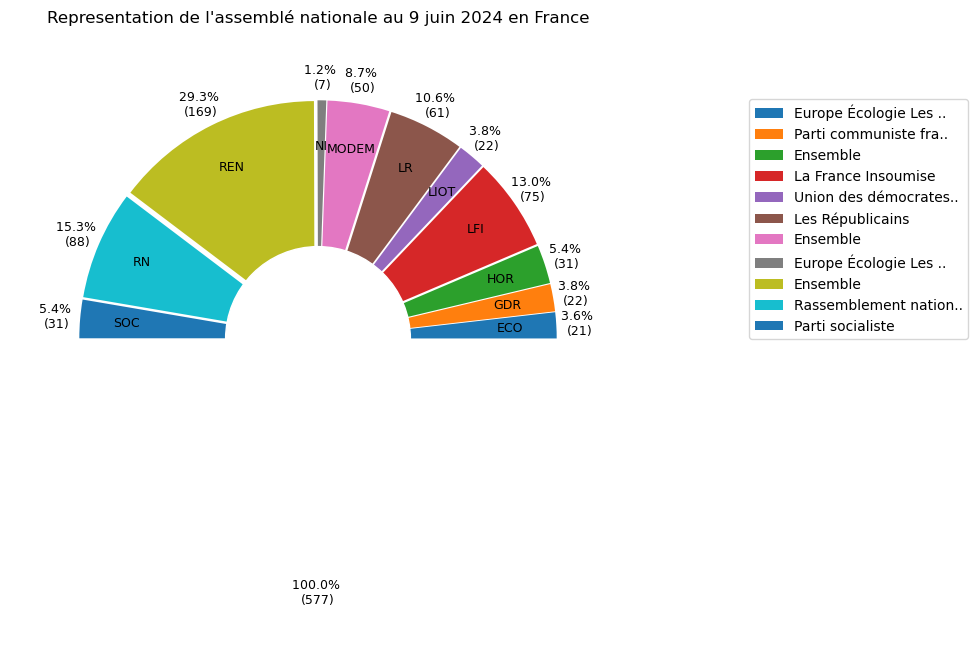

In [7]:
plot_halfpie(datagroup)

### Graphique de points en demi-cercle

In [8]:
## Définition d'une fonction qui nous permettra de repartir nos places sur plusieurs rangées
def list_places(places, row=14):
    """
    Listing all coordinates of the places of the assembly

    Parameters:
    ---
    places: int
        Number of places
    row: int, default=14
        Number of row

    Returns:
    ---
    pandas.DataFrame:
        DataFrame containing for each of the places the row, the place in the row, the x axis coordinate and the y axis coordinate
        The DataFrame columns are {'row', 'place', 'posx', 'posy'}
    """
    ## Initialisation des valeurs
    pos = []

    ## Création d'une liste de rayons pour chaque rangée
    radius = np.linspace(0.4, 1, row)

    ## Création d'une liste de places par rangée (qu'on completera sur les dernières rangées)
    places_row = np.linspace(places//row - row - 2, places//row + row + 1, row, dtype = int)
    for miss in range(int(places - places_row.sum())):
        places_row[row - miss -1] += 1

    ## Obtention des coordonnées des places sous la forme d'une liste de liste
    for r in range(row):
        tau = np.linspace(np.pi, 0, int(places_row[r]))
        for i in range(int(places_row[r])):
            ## Chaque liste contiendra : le numero de la rangée
            ## Le numero du siege de la rangée
            ## les coordonées en abscisse, puis en ordonné
            pos += [[r+1, i+1, radius[r]*np.cos(tau[i]), radius[r]*np.sin(tau[i])]]
            
    return pd.DataFrame(pos, columns=['row', 'place', 'posx', 'posy'])

In [9]:
def plot_halfscatterpie(data, row=14):
    """
    Plot a half pie chart composed of scattered dots

    Parameters
    ---
    data: pandas.DataFrame
        DataFrame you want to plot
    row: int, default=14
        Number of row to plot
    """
    ## Initialisation du graphique
    fig, ax=plt.subplots()
    ax.axis('equal')
    ax.set_axis_off()

    ## Recuperation de la répartition des places dans le graphique
    pos = list_places(data.shape[0], row)

    ## Placement des points dans le graphique
    for i in data.index:
       ax.plot(pos.loc[i, 'posx'], pos.loc[i, 'posy'], 'o', markersize=5)
    ## sns.scatterplot(data=pos.merge(data, left_index=True, right_index=True), x='posx', y='posy', hue='groupe_sigle')
        
    ## Affichage de la légende
    ax.legend(datagroup.index + ' - ' + datagroup['groupe_name'], loc=(1.1, 0.18))
    ax.set_title("Representation de l'assemblé nationale au 9 juin 2024 en France")

    ## Affichage du total de siège
    ax.text(x=0, y=0.15, s=f"Total :\n {data.shape[0]} sièges",
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=15)

    ## Affichage du graphique
    plt.show()

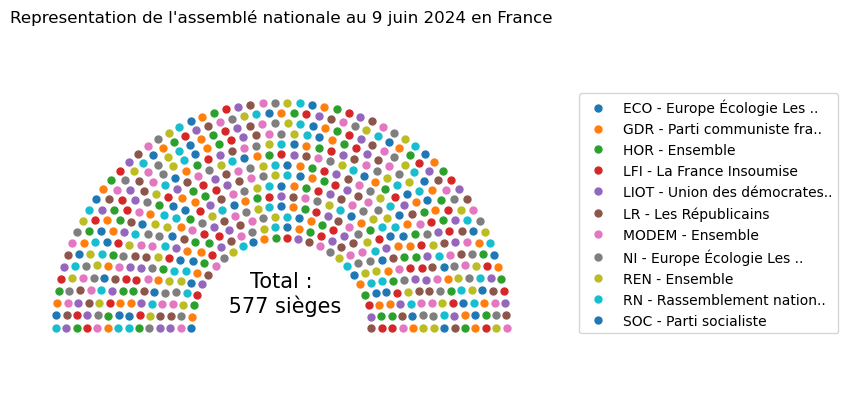

In [10]:
plot_halfscatterpie(data_now, 14)

## Etape 3 : Approfondissement de chaque graphique

Nous avons pu réaliser trois graphiques plutôt avancé pour chaque situation.<br/>
Il est evident que ces grapghiques ne sont pas exempt de défaut, et nous allons maintenant pouvoir nous concentré sur l'amélioration et la correction de chacun d'entre eux.<br/>
<br/>
Commençons par une étude générale, puis au cas par cas.

### Commentaires généraux

Un problème évident est la palette de couleur utilisé pour chaque parti et coalition.<br/>
En effet, une assemblé nationale est rarement répartie de cette manière, et heureusement!<br/>
Un première grand axe d'amélioration sera donc de revoir la palette de couleur, de choisir des coleurs adaptés a chaque partie. Et pour devancer un peu le travail en partie 4, nous essayerons de trouver une repartition applicable facilement a n'importe quelle election.<br/>
<br/>
Dans la même logique, representer les parties, de gauches à droite selon leur appartenance politique est une necessité absolu pour donné un semblant d'utilité à la lecture de ces graphiques.<br/>
<br/>
Et en parlant de coalition, une deuxième donnée importante à representer pourrait être cette fois-ci unique à l'éléction legislatives de 2022 en France; en effet, lors de cette éléction, les parties `LFI`, `ECO`, `GDR` et `SOC` se sont reunis sous une banière commune du nom de `NUPES` (alias `Nouvelle Unions Populaire, Ecologique et Sociciale`) souvent abrégé `NUP`.<br/>
Et ce n'était pas les seuls! `HOR`, `MODEM` et `REN` sont parti en capagne sous le nom du seul groupe `Ensemble` (abrégé `ENS`).<br/>
Ces donnés sont primordiales à prendre en compte, augmentant l'exatitude de nos chiffres et permettraient une lisibilité accrue de nos graphiques.<br/>
Surtout que ces types d'unions, ou de coalition ne sont pas un fait anecdotique à cette élection. Européennes, election nationales, en France ou ailleurs, on retrouve constamment ce type d'union ou de regroupement.<br/>
Il faut donc qu'on retravaile nos données et trouve un moyen de facilement palier à ce problème.

#### Analyse des couleurs par étiquettes

Après une première lecture des couleurs en politique sur wikipédia (https://fr.wikipedia.org/wiki/Couleur_politique)<br/>
On arrive déjà à lié des couleurs aux différentes idéologies.<br/>
<ul>
    <li>Le blanc : Monarchisme et liberté</li>
    <li>Le bleu : Conservationnisme, religieux ou indépendentiste</li>
    <li>Le bleu clair: Centre-droit</li>
    <li>Le brun: Extrême-droite</li>
    <li>Le jaune: Libéralisme</li>
    <li>Le noir: L'anarchisme, l'extrême-droite, religieux ou pirate</li>
    <li>L'orange: Centre ou religieux, et variés</li>
    <li>Le rose: Gauche et centre gauche</li>
    <li>Le rouge: Gauche et Extrême-gauche</li>
    <li>Le vert: Ecologie ou indépendentistes</li>
    <li>Le violet: Centre, monarchie, ou union gauche-droite</li>
</ul>

Voila un panel de couleur divers et variés avec des associations larges.<br/>
Evidemment, nous n'allons pas pouvoir utiliser ces couleurs avec la complexité de representation associé dans chaque pays ou chaque election.<br/>
Cependant nous allons pouvoir associés des couleurs aux differentes idéologie les plus communnes.<br/>

En nous appuyant sur les travaux menés par <i>Christophe de Nantois</i>, nous utiliserons l'une des representations choisis (en simplifiant la situation et en excluant la dimension religieuse) d'un graphique à deux axes basé sur des critère de :
<ul>
    <li>L'axe culturel: Conservationnisme ou liberalisme culturel</li>
    <li>L'axe economique: Libéralisme économique(Etat Faible) ou interventionisme étatique(Etat Fort)</li>
</ul>
Nous utiliseront ce graphique avec les données de l'éléction présidentielle de 2022, données recoltées et analysées par Science Po.
<img src="doubleaxe.png" width=600>

Ainsi, nous faire deux chose :
<ul>
    <li>Créer une color map sur deux axes</li>
    <li>Repartir les differents parties et opinions politique sur ce plan</li>
</ul>

#### Conception d'une color map cohérante

Déjà, nous allons commencer par concevoir des zones de couleurs unis selon les principaux "courants" faciles à représenter. Je parle ici du socialisme (ou gauche), liberalisme, conservatisme, centre, extrême-droite et extrême gauche. (Nous eviterons le terme de "droite" car il fait reference à la fois au liberalisme economique et à une idéologie conservatiste - jusqu'à un certain point -).<br/>
En cohérence avec ce que nous avons établi précédement, nous lierons les couleurs comme indiqué ci-dessous (couleur selection en cohérence avec l'éléction léglisative de 2022 en France) :
<ul>
    <li>Extrême-Gauche (EG) - Rouge (hex: #bb0000)</li> 
    <li>Socialisme (S) - Rose (hex: #ff8080)</li>
    <li>Centre (N) - Violet (hex: #8D2E88)</li>
    <li>Liberalisme (L) - Jaune (hex: #ffeb00)</li>
    <li>Conservatisme (C) - Bleu (hex: 	#0066cc)</li>
    <li>Extrême-Droite (EG) - Brun (hex: #7E5835)</li>
    <li>Autre (A) - Gris (hex: )</li>
</ul>

créons déjà un dictionnaire avec ces differentes associations.

In [11]:
colordict = {'EG': '#bb0000',
            'S': '#ff8080',
            'N': '#8d2e88',
            'L': '#ffeb00',
            'C': '#0066cc',
            'ED': '#3e2810',
            'A': '#dddddd',
            '': '#ffffff'}

Dans notre situation, nous imaginerons que chaque point auras deux valeurs.<br/>
`libeco`: `float` compris entre $-1$ et $1$ indiquant l'abscisse du point.<br/>
`libcul`: `float` compris entre $-1$ et $1$ indiquant l'ordonnée du point.<br/>


Soit $x$, $y \in \mathbb{R}$, <br/>
Nous allons indiqué - en expliquant succintement notre raisonnement - les valeurs des differents groupes selon les valeurs de $(x, y)$.<br/>
Voila une proposition :<br/>
- Si $y \in [-1,-0.75]$, $(x,y)$ represente un parti d'extrême droite.<br/>
    En effet, tout les partis d'extrême droite sont courrament representé avec un accent très fort sur le conservatisme culturel (valeur traditionnelle, famillialle, religieuse, etc..).
- Si $x \in [0.25,1]$ et $y \in [-0.75,1]$, $(x,y)$ represente un parti libéral.<br/>
    Cela englobe tout les parties ayant une croyance dans le libéralisme économique pronnoncé, mais exclura les idéologies d'extrême droite.
- Si $y \in [-075,-0.25]$, $(x,y)$ represente un parti conservateur.<br/>
    Idem, cela englobera tout les parties ayant une croyance dans des valeurs de conservatisme culturel prononcé, mais exclura les idéologies d'extrême droite.
- Si $(x,y) \in ([-1,-0.75]\times[0,1])\cup([-0.75,0]\times[0.75,1])$, $(x,y)$ represente un parti d'extrême gauche.<br/>
    On assosiera à l'extrême gauche les idéologies pronnant un liberalisme culturel très pronnoncé (valeurs lgbtqia+, legalisation de drogues, liberté de culte, etc..) et / ou un interventionnisme étatique très pronnoncé (salaire à vie, absence de propriété privé, etc..).
- Si $(x,y) \in ([-0.75,-0.25]\times[0,75])\cup([-0.25,0]\times[0.25,0.75])$, $(x,y)$ represente un parti socialiste.<br/>
    On associera au socialisme les idéologies pronnant un liberalisme culturel et / ou un interventionnisme étatique pronnoncé en excluant les idéologies d'extrême gauche.
- Si $x \in [-0.25,0.25]$ et $y \in [-0.25,0.25]$, $(x,y)$ represente un parti du centre.<br/>
- Si $x et y$ ne respectent aucune de ses conditions (Si $(x,y)\in ([-1,-0.25]\times[-0.25,0])\cup([0,0.25]\times[0.25,1])$, $(x,y)$ represente un parti autre.<br/>


Pour aider à la visualisation de ces representations, j'ai ci-dessous continuellement ecrit un programme qui represente le plan, et ses couleurs.

[]

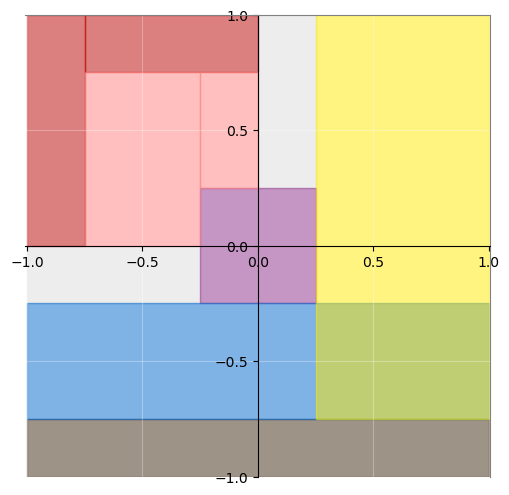

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
plt.axis('equal')

ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('gray')
ax.spines['top'].set_color('gray')

plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.xticks([-1, -0.5, 0, 0.5, 1])

ED = plt.Rectangle((-1, -1), 2, 0.25, color=colordict['ED'], alpha = 0.5)
L = plt.Rectangle((0.25, -0.75), 0.75, 1.75, color=colordict['L'], alpha = 0.5)
C = plt.Rectangle((-1, -0.75), 2, 0.5, color=colordict['C'], alpha = 0.5)
S1 = plt.Rectangle((-0.75, 0), 0.5, 0.75, color=colordict['S'], alpha = 0.5)
S2 = plt.Rectangle((-0.25, 0.25), 0.25, 0.5, color=colordict['S'], alpha = 0.5)
EG1 = plt.Rectangle((-1, 0), 0.25, 1, color=colordict['EG'], alpha = 0.5)
EG2 = plt.Rectangle((-0.75, 0.75), 0.75, 0.25, color=colordict['EG'], alpha = 0.5)
N = plt.Rectangle((-0.25, -0.25), 0.5, 0.5, color=colordict['N'], alpha = 0.5)
A1 = plt.Rectangle((-1, -0.25), 0.75, 0.25, color=colordict['A'], alpha = 0.5)
A2 = plt.Rectangle((0, 0.25), 0.25, 0.75, color=colordict['A'], alpha = 0.5)


ax.add_patch(A1)
ax.add_patch(A2)
ax.add_patch(EG2)
ax.add_patch(N)
ax.add_patch(EG1)
ax.add_patch(S1)
ax.add_patch(S2)
ax.add_patch(ED)
ax.add_patch(C)
ax.add_patch(L)
plt.grid(alpha = 0.3, c='white')

plt.plot()

Déjà, deux choses, me sautent aux yeux.<br/>
Nous n'avons pas prévu les parties non-extrêmes ayant des idéologies communes, comme les parties se situant de la zones "conservatrice" et la zone "libéral". Le but de cette conception d'une colormap sera justement de résoudre ce type de problème! Donc pour le moment, nous n'indiqueront pas de couleur dans cette zone.<br/>
Pour la même raison, car je pense que les partis très liberaux et un peu conservateur merite une couleur differente des parties très libéraux et extrême dans des idées de libéralisme culturel mérite une couleur différente entre eux. Nous ecluerons des valeurs "libérales" les points $(x, y)$ où $0.25<x<1$ et $0.5<y<1$.<br/>
Le deuxième soucis, aussi lié a cette zone, est l'absence de parti écologique. En effet, si en France le parti "Les Ecologistes", anciennement "Europe Ecologie Les Verts" est un partie au valeurs socialistes, d'autres type de parties ecologistes peuvent représenté d'autres courant politique. Comme des parties extrêmement proche d'idéologie de libéralisme culturel et de liberalisme économique (Anarchisme écologique) ou autre. C'est pour cela que nous exclueront tout les parties dit "ecologiques" de ce graphique en leur attribuant une couleur verte qui ne changera pas selon l'idéologie sur les questions économiques et culturelles.

Enfin, un problème moins evidant mais bien plus important concerne les frontières de nos differents groupes (valeurs d'adhérences). En effet, de quelle couleurs représenté le point de coordonées $(0.25, -0.25)$ dans le plan etant à la jonction de 3 (voir 4) idéologies differentes. et si ses coordonées étaient $(0.24,-0.24)$, être a peine moins libéral et conservateur, justifie-t-il de devenir centriste?<br/>
<br/>
Hors la question politique et idologique intéréssente, pour une color map, cette absence de "pente" est inadmissible.

### Création d'une color map "variée"

En soit, si l'on exclu ces légères modifications, nous avons créer une color map! Problème? Elle n'indique aucune difference entre des parties pourtant très éloignés (comme libéral economique pur et libéral economique associé à libéral culturel).<br/>
Pour cela, je vais explorer une première proposition faisant intervenir des points cléfs au couleurs des idéologies que nous avons décrit, et des "importances" sur chacun de ces points. Mathématiquement, nous allons proposer une modélisation de la situation utilisant les barycentres.

En effet, nous allons selection des points dont la couleurs parrait evidente.<br/>
Pour les selectionner, on décomposera le plan en carré ayant une surface de $0.25^2$. Et on créera un point en son centre ayant la couleur du carré representé.<br/>
Cela se traduiré par les graphique suivant :

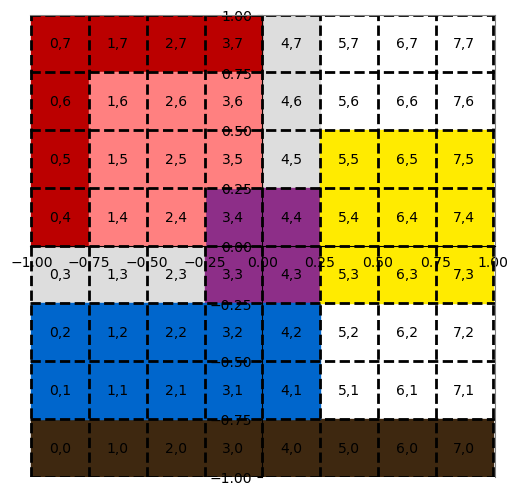

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
    
ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)
ax.axis('equal')

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('gray')
ax.spines['top'].set_color('gray')

ax.set_yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
ax.set_xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])

ED = plt.Rectangle((-1, -1), 2, 0.25, color=colordict['ED'])
L = plt.Rectangle((0.25, -0.25), 0.75, 0.75, color=colordict['L'])
C = plt.Rectangle((-1, -0.75), 1.25, 0.5, color=colordict['C'])
S1 = plt.Rectangle((-0.75, 0), 0.5, 0.75, color=colordict['S'])
S2 = plt.Rectangle((-0.25, 0.25), 0.25, 0.5, color=colordict['S'])
EG1 = plt.Rectangle((-1, 0), 0.25, 1, color=colordict['EG'])
EG2 = plt.Rectangle((-0.75, 0.75), 0.75, 0.25, color=colordict['EG'])
N = plt.Rectangle((-0.25, -0.25), 0.5, 0.5, color=colordict['N'])
A1 = plt.Rectangle((-1, -0.25), 0.75, 0.25, color=colordict['A'])
A2 = plt.Rectangle((0, 0.25), 0.25, 0.75, color=colordict['A'])


ax.add_patch(A1)
ax.add_patch(A2)
ax.add_patch(EG2)
ax.add_patch(N)
ax.add_patch(EG1)
ax.add_patch(S1)
ax.add_patch(S2)
ax.add_patch(ED)
ax.add_patch(C)
ax.add_patch(L)
ax.grid(c='black', linestyle='--', lw = 2)

coord = np.linspace(-0.875, 0.875, 8)
for i in range(8):
    for j in range(8):
        ax.text(coord[i], coord[j], str(i)+','+str(j),
                va='center', ha='center')

In [14]:
L = [(-0.875, -0.875, 'ED'),
 (-0.875, -0.625, 'C'),
 (-0.875, -0.375, 'C'),
 (-0.875, -0.125, 'A'),
 (-0.875, 0.125, 'EG'),
 (-0.875, 0.375, 'EG'),
 (-0.875, 0.625, 'EG'),
 (-0.875, 0.875, 'EG'),
 (-0.625, -0.875, 'ED'),
 (-0.625, -0.625, 'C'),
 (-0.625, -0.375, 'C'),
 (-0.625, -0.125, 'A'),
 (-0.625, 0.125, 'S'),
 (-0.625, 0.375, 'S'),
 (-0.625, 0.625, 'S'),
 (-0.625, 0.875, 'EG'),
 (-0.375, -0.875, 'ED'),
 (-0.375, -0.625, 'C'),
 (-0.375, -0.375, 'C'),
 (-0.375, -0.125, 'A'),
 (-0.375, 0.125, 'S'),
 (-0.375, 0.375, 'S'),
 (-0.375, 0.625, 'S'),
 (-0.375, 0.875, 'EG'),
 (-0.125, -0.875, 'ED'),
 (-0.125, -0.625, 'C'),
 (-0.125, -0.375, 'C'),
 (-0.125, -0.125, 'N'),
 (-0.125, 0.125, 'N'),
 (-0.125, 0.375, 'S'),
 (-0.125, 0.625, 'S'),
 (-0.125, 0.875, 'EG'),
 (0.125, -0.875, 'ED'),
 (0.125, -0.625, 'C'),
 (0.125, -0.375, 'C'),
 (0.125, -0.125, 'N'),
 (0.125, 0.125, 'N'),
 (0.125, 0.375, 'A'),
 (0.125, 0.625, 'A'),
 (0.125, 0.875, 'A'),
 (0.375, -0.875, 'ED'),
 (0.375, -0.625, ''),
 (0.375, -0.375, ''),
 (0.375, -0.125, 'L'),
 (0.375, 0.125, 'L'),
 (0.375, 0.375, 'L'),
 (0.375, 0.625, ''),
 (0.375, 0.875, ''),
 (0.625, -0.875, 'ED'),
 (0.625, -0.625, ''),
 (0.625, -0.375, ''),
 (0.625, -0.125, 'L'),
 (0.625, 0.125, 'L'),
 (0.625, 0.375, 'L'),
 (0.625, 0.625, ''),
 (0.625, 0.875, ''),
 (0.875, -0.875, 'ED'),
 (0.875, -0.625, ''),
 (0.875, -0.375, ''),
 (0.875, -0.125, 'L'),
 (0.875, 0.125, 'L'),
 (0.875, 0.375, 'L'),
 (0.875, 0.625, ''),
 (0.875, 0.875, '')]

In [15]:
datacolor = pd.DataFrame({'posx': [L[i][0] for i in range(64)], 'posy': [L[i][1] for i in range(64)], 'color': [L[i][2] for i in range(64)]})
datacolor

,posx,posy,color
0,-0.875,-0.875,ED
1,-0.875,-0.625,C
2,-0.875,-0.375,C
3,-0.875,-0.125,A
4,-0.875,0.125,EG
...,...,...,...
59,0.875,-0.125,L
60,0.875,0.125,L
61,0.875,0.375,L
62,0.875,0.625,


In [16]:
values = np.linspace(-0.875, 0.875, 8)
datapartycolor = pd.DataFrame(index=values, columns=values)
for i in range(8):
    for j in range(8):
        datapartycolor.loc[values[i], values[j]] = L[j*8+i][2]
datapartycolor.head(5)

,-0.875,-0.625,-0.375,-0.125,0.125,0.375,0.625,0.875
-0.875,ED,ED,ED,ED,ED,ED,ED,ED
-0.625,C,C,C,C,C,,,
-0.375,C,C,C,C,C,,,
-0.125,A,A,A,N,N,L,L,L
0.125,EG,S,S,N,N,L,L,L


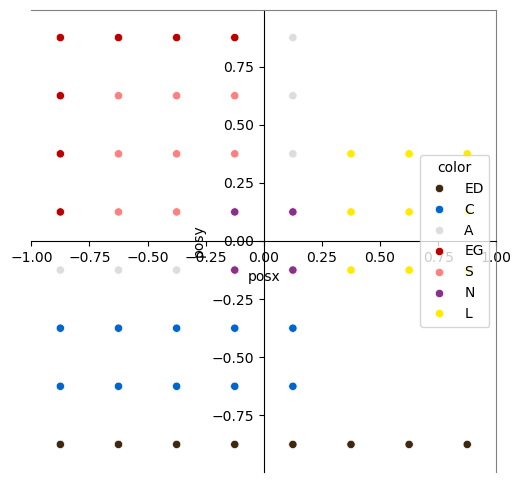

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)
ax.axis('equal')

ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('gray')
ax.spines['top'].set_color('gray')

sns.scatterplot(data=datacolor, x='posx', y='posy', hue='color', palette=colordict)

plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])

plt.grid(alpha = 0.3, c='white')
plt.show()

In [18]:
totalc = 0

In [19]:
def invsqrd(d):
    return 1 /  (d ** 2)

def weight(p, q, func = invsqrd):
    if math.dist(p, q) == 0:
        return 100
    return func(math.dist(p, q))
    
def hex_to_ints(hex):
    return np.array([int(hex[1:3], base=16), int(hex[3:5], base=16), int(hex[5:7], base=16)], dtype=float)

def int_to_16(n):
    dict16 = {10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f'}
    rstring = ''
    if n // 16 >= 10:
        rstring += dict16[n // 16]
    else:
        rstring += str(int(n // 16))
    if n % 16 >= 10:
        return rstring + dict16[n % 16]
    return rstring + str(int(n % 16))
    
def colormaping(dataframe, colordict, x, y, posx='posx', posy='posy', color='color'):
    p = (x, y)
    totalw = 0
    totalc = np.array([0., 0., 0.])
    for i in dataframe.loc[:, posx]:
        for j in dataframe.loc[:, posy]:
            w = weight(p, (i, j))
            totalw += w
            c = hex_to_ints(colordict[dataframe.loc[(dataframe[posx]==i) & (dataframe[posy]==j), color].values[0]])
            totalc += c * w
    (r, g, b) = totalc / totalw
    result = '#' + int_to_16(int(np.round(r))) + int_to_16(int(np.round(g))) + int_to_16(int(np.round(b)))
    return result

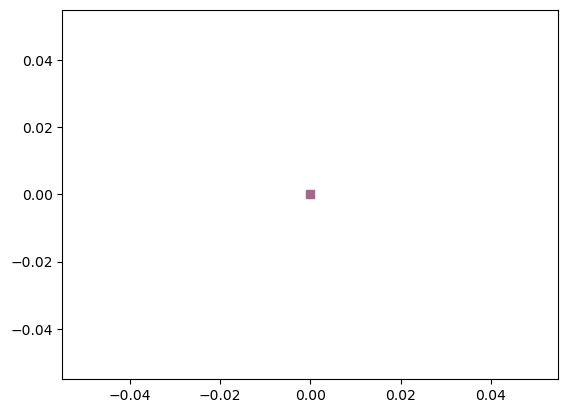

CPU times: total: 1.2 s
Wall time: 1.21 s


In [20]:
%%time

plt.plot(0, 0, marker = 's', color = colormaping(datacolor, colordict, 0, 0))

plt.show()

In [23]:
def colormaping(dataframe, colordict, x, y, posx='posx', posy='posy', color='color', func=invsqrd):
    p = (x, y)
    totalw = 0
    totalc = np.array([0., 0., 0.])
    for i in dataframe.loc[:, posx]:
        if np.abs(x - i) < 0.3 : 
            for j in dataframe.loc[:, posy]:
                    if np.abs(y - j) < 0.3:
                        w = weight(p, (i, j), func=invsqrd)
                        totalw += w
                        c = hex_to_ints(colordict[dataframe.loc[(dataframe[posx]==i) & (dataframe[posy]==j), color].values[0]])
                        totalc += c * w
    (r, g, b) = totalc / totalw
    result = '#' + int_to_16(int(np.round(r))) + int_to_16(int(np.round(g))) + int_to_16(int(np.round(b)))
    return result

In [32]:
%%time
def plotcolormap(numdot, func=invsqrd):
    for i in np.linspace(-1, 1, numdot):
        for j in np.linspace(-1, 1, numdot):
            plt.plot(i, j, marker = 's', color = colormaping(datacolor, colordict, i, j, func=invsqrd))
    plt.show()

plotcolormap(60)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [33]:
%%time
def inv(d):
    return 1/d
plotcolormap(60, func=inv)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [34]:
datacolor=pd.DataFrame({'posx': [-1, -1, -0.5, -0.5, 0, 1, 0.5, 0, 0, 0.5, -0.5],
                        'posy': [1, 0.5, 1, 0.5, 0, 0, 0, -0.5, -1, -1, -1],
                        'color': ['EG', 'EG', 'EG', 'S', 'N', 'L', 'L', 'C', 'ED', 'ED', 'ED'],
                        'poids': [5, 1, 1, 8, 4, 6, 3, 10, 4, 2, 2]})
datacolor

,posx,posy,color,poids
0,-1.0,1.0,EG,5
1,-1.0,0.5,EG,1
2,-0.5,1.0,EG,1
3,-0.5,0.5,S,8
4,0.0,0.0,N,4
5,1.0,0.0,L,6
6,0.5,0.0,L,3
7,0.0,-0.5,C,10
8,0.0,-1.0,ED,4
9,0.5,-1.0,ED,2


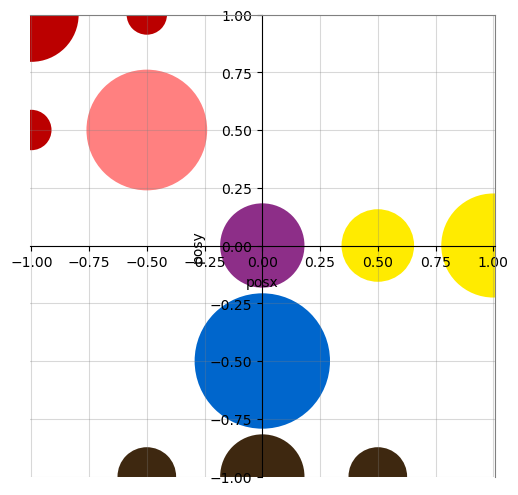

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)
ax.axis('equal')

ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('gray')
ax.spines['top'].set_color('gray')

g = sns.scatterplot(data=datacolor,
                x='posx',
                y='posy',
                hue='color',
                palette=colordict,
                size='poids',
               sizes=(1000,10000))

plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.grid(alpha = 0.3, c='grey')
plt.legend([],[], frameon=False)
plt.show()

In [36]:
def colormaping(dataframe, colordict, x, y, posx='posx', posy='posy', color='color', poids='poids', func=invsqrd, lim=1):
    p = (x, y)
    totalw = 0
    totalc = np.array([0., 0., 0.])
    for i in dataframe.loc[:, posx]:
        if np.abs(x - i) <= lim : 
            for j in dataframe.loc[dataframe[posx]==i, posy]:
                    if np.abs(y - j) <= lim:
                        row = ((dataframe[posx]==i) & (dataframe[posy]==j))
                        w = weight(p, (i, j), func=invsqrd)
                        totalw += w
                        c = hex_to_ints(colordict[dataframe.loc[row, color].values[0]])
                        totalc += c * w
    (r, g, b) = totalc / totalw
    result = '#' + int_to_16(int(np.round(r))) + int_to_16(int(np.round(g))) + int_to_16(int(np.round(b)))
    return result

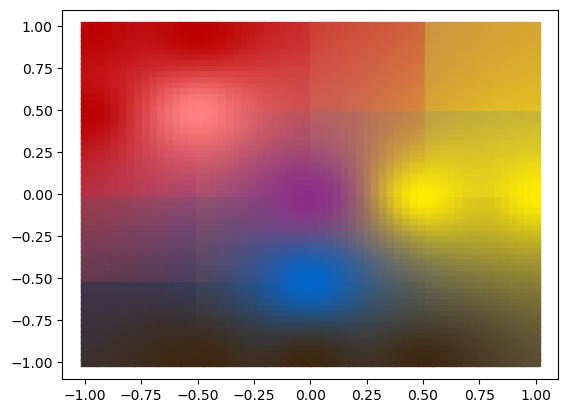

CPU times: total: 23.9 s
Wall time: 24 s


In [37]:
%%time
def plotcolormap(numdot, func=invsqrd):
    for i in np.linspace(-1, 1, numdot):
        for j in np.linspace(-1, 1, numdot):
            plt.plot(i, j, marker = 's', color = colormaping(datacolor, colordict, i, j, func=invsqrd))
    plt.show()

plotcolormap(60)

In [38]:
datacolor=pd.DataFrame({'posx': [-1, -1, -0.5, -0.4, 0, 1, 0.5, 0, 0.5, -0.5, 0, 0.5, -0.5],
                        'posy': [1, 0.5, 1, 0.4, 0, 0, 0, -0.5, -0.5, -0.5, -1, -1, -1],
                        'color': ['EG', 'EG', 'EG', 'S', 'N', 'L', 'L', 'C', 'C', 'C', 'ED', 'ED', 'ED'],
                        'poids': [6, 2, 2, 10, 10, 7, 3, 7, 1.5, 1.5, 5, 2.5, 2.5]})
datacolor

,posx,posy,color,poids
0,-1.0,1.0,EG,6.0
1,-1.0,0.5,EG,2.0
2,-0.5,1.0,EG,2.0
3,-0.4,0.4,S,10.0
4,0.0,0.0,N,10.0
5,1.0,0.0,L,7.0
6,0.5,0.0,L,3.0
7,0.0,-0.5,C,7.0
8,0.5,-0.5,C,1.5
9,-0.5,-0.5,C,1.5


In [39]:
def colormaping(dataframe, colordict, x, y, posx='posx', posy='posy', color='color', poids='poids', func=invsqrd, lim=1):
    p = (x, y)
    totalw = 0
    totalc = np.array([0., 0., 0.])
    for i in dataframe.loc[:, posx]:
        if np.abs(x - i) <= lim : 
            for j in dataframe.loc[dataframe[posx]==i, posy]:
                    if np.abs(y - j) <= lim:
                        row = ((dataframe[posx]==i) & (dataframe[posy]==j))
                        w = weight(p, (i, j), func=invsqrd)
                        totalw += w * dataframe.loc[row, poids].values[0]
                        c = hex_to_ints(colordict[dataframe.loc[row, color].values[0]])
                        totalc += c * w * dataframe.loc[row, poids].values[0]
    (r, g, b) = totalc / totalw
    result = '#' + int_to_16(int(np.round(r))) + int_to_16(int(np.round(g))) + int_to_16(int(np.round(b)))
    return result

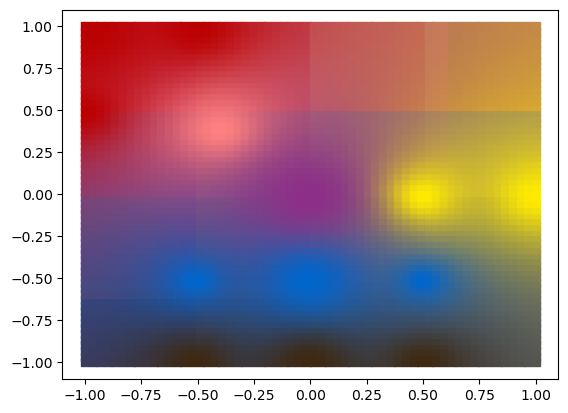

CPU times: total: 44.2 s
Wall time: 44.6 s


In [40]:
%%time
def plotcolormap(numdot, func=invsqrd, lim=1):
    for i in np.linspace(-1, 1, numdot):
        for j in np.linspace(-1, 1, numdot):
            plt.plot(i, j, marker = 's', color = colormaping(datacolor, colordict, i, j, func=invsqrd, lim=lim))
    plt.show()

plotcolormap(60)

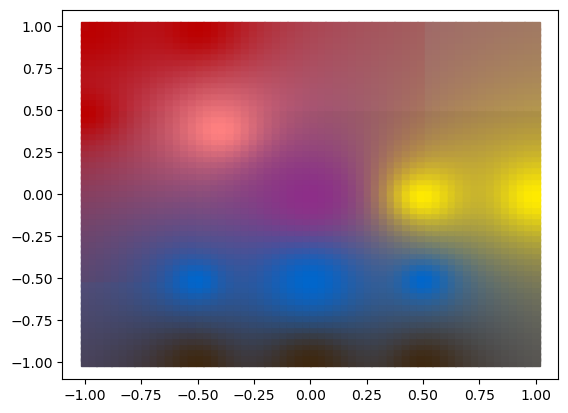

CPU times: total: 1min 4s
Wall time: 1min 4s


In [41]:
%%time
def invpow4(d):
    return 1/(d ** 4)

def plotcolormap(numdot, func=invpow4, lim=1.5):
    for i in np.linspace(-1, 1, numdot):
        for j in np.linspace(-1, 1, numdot):
            plt.plot(i, j, marker = 's', color = colormaping(datacolor, colordict, i, j, func=invsqrd, lim=lim))
    plt.show()

plotcolormap(60)

In [42]:
def weight(p, q, func = invsqrd, poids=1):
    if math.dist(p, q) == 0:
        return 100
    return func(math.dist(p, q))* poids
    
def hex_to_ints(hex):
    return np.array([int(hex[1:3], base=16), int(hex[3:5], base=16), int(hex[5:7], base=16)], dtype=float)

def int_to_16(n):
    dict16 = {10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f'}
    rstring = ''
    if n // 16 >= 10:
        rstring += dict16[n // 16]
    else:
        rstring += str(int(n // 16))
    if n % 16 >= 10:
        return rstring + dict16[n % 16]
    return rstring + str(int(n % 16))
    
def colormaping(dataframe, colordict, x, y, posx='posx', posy='posy', color='color', poids='poids', func=invsqrd, lim=1):
    p = (x, y)
    totalw = 0
    totalc = np.array([0., 0., 0.])
    for i in dataframe.loc[:, posx]:
        if np.abs(x - i) <= lim : 
            for j in dataframe.loc[dataframe[posx]==i, posy]:
                    if np.abs(y - j) <= lim:
                        row = ((dataframe[posx]==i) & (dataframe[posy]==j))
                        w = weight(p, (i, j), func=func, poids = dataframe.loc[row, poids].values[0])
                        totalw += w
                        c = hex_to_ints(colordict[dataframe.loc[row, color].values[0]])
                        totalc += c * w
    (r, g, b) = totalc / totalw
    result = '#' + int_to_16(int(np.round(r))) + int_to_16(int(np.round(g))) + int_to_16(int(np.round(b)))
    return result

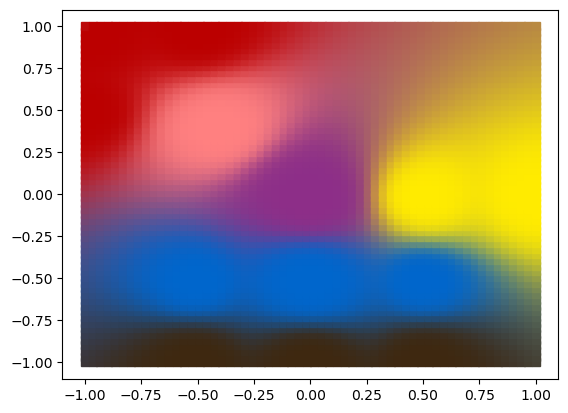

CPU times: total: 59.5 s
Wall time: 1min


In [43]:
%%time
def invpow4(d):
    return 1/(d ** 4)

def plotcolormap(numdot, func=invpow4, lim=2):
    for i in np.linspace(-1, 1, numdot):
        for j in np.linspace(-1, 1, numdot):
            plt.plot(i, j, marker = 's', color = colormaping(datacolor, colordict, i, j, func=func, lim=lim))
    plt.show()

plotcolormap(60)

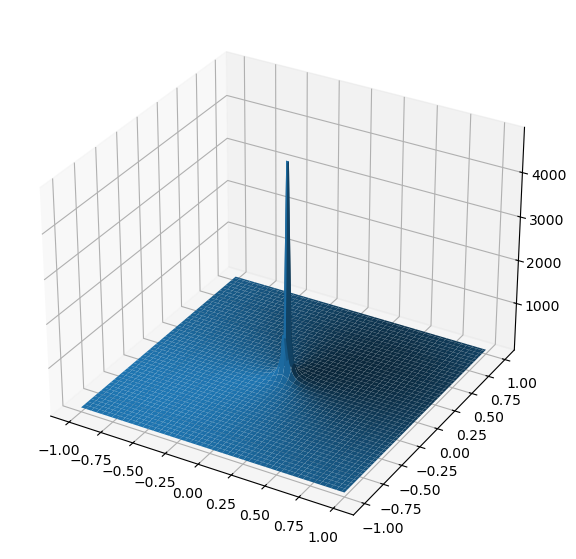

In [44]:
L = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(L, L)
Z = 1/np.sqrt(X**2 + Y**2)**2
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z)

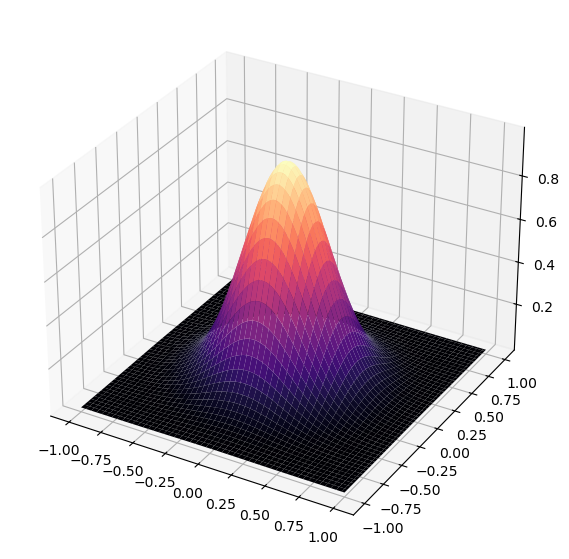

In [45]:
L = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(L, L)
Z = 1/np.exp((X**2 + Y**2) * 3) ** 2
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, cmap='magma')

In [46]:
datacolor=pd.DataFrame({'posx': [-0.9, -1, -0.5, -0.4, 0, 1, 0.5, 0, 0.4, -0.4, 0, 0.4, -0.4],
                        'posy': [0.9, 0.5, 1, 0.4, 0, 0, 0, -0.5, -0.5, -0.5, -0.9, -0.9, -0.9],
                        'color': ['EG', 'EG', 'EG', 'S', 'N', 'L', 'L', 'C', 'C', 'C', 'ED', 'ED', 'ED'],
                        'poids': [5, 4, 5, 5, 4, 5, 4, 4, 4, 4, 3, 4, 4]})
datacolor

,posx,posy,color,poids
0,-0.9,0.9,EG,5
1,-1.0,0.5,EG,4
2,-0.5,1.0,EG,5
3,-0.4,0.4,S,5
4,0.0,0.0,N,4
5,1.0,0.0,L,5
6,0.5,0.0,L,4
7,0.0,-0.5,C,4
8,0.4,-0.5,C,4
9,-0.4,-0.5,C,4


In [47]:
def view3D(angle=45, y=30):
    L = np.linspace(-1, 1, 40)
    X, Y = np.meshgrid(L, L)
    Z = np.zeros((40,40))
    for i in range(datacolor.shape[0]):
        Z += 1/np.exp(((X-datacolor.loc[i, 'posx'])**2 + 
                       (Y-datacolor.loc[i, 'posy'])**2) * 3) * datacolor.loc[i, 'poids'] ** 2
        from ipywidgets import interact, interactive, fixed, interact_manual
    fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
    ax.view_init(azim=angle, elev=y)
    ax.plot_surface(X, Y, Z, cmap='magma')

interact(view3D, angle=widgets.IntSlider(min=-0, max=360, step=15, value=45), y=widgets.fixed(30))

interactive(children=(IntSlider(value=45, description='angle', max=360, step=15), Output()), _dom_classes=('wi…

<function __main__.view3D(angle=45, y=30)>

In [169]:
def weight(p, q, poids=1):
    if math.dist(p, q) == 0:
        return 1000
    return 1/(np.exp(math.dist(p, q) * 2)) * poids
    
def hex_to_ints(hex):
    return np.array([int(hex[1:3], base=16), int(hex[3:5], base=16), int(hex[5:7], base=16)], dtype=float)

def int_to_16(n):
    dict16 = {10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f'}
    rstring = ''
    if n // 16 >= 10:
        rstring += dict16[n // 16]
    else:
        rstring += str(int(n // 16))
    if n % 16 >= 10:
        return rstring + dict16[n % 16]
    return rstring + str(int(n % 16))
    
def colormaping(dataframe, colordict, x, y, posx='posx', posy='posy', color='color', poids='poids', lim=1):
    p = (x, y)
    totalw = 0
    totalc = np.array([0., 0., 0.])
    for i in dataframe.loc[:, posx]:
        if np.abs(x - i) <= lim : 
            for j in dataframe.loc[dataframe[posx]==i, posy]:
                    if np.abs(y - j) <= lim:
                        row = ((dataframe[posx]==i) & (dataframe[posy]==j))
                        w = weight(p, (i, j), poids = dataframe.loc[row, poids].values[0])
                        totalw += w
                        c = hex_to_ints(colordict[dataframe.loc[row, color].values[0]])
                        totalc += c * w
    (r, g, b) = totalc / totalw
    r = min(r**2/128 , 255)
    g = min(g**2/128, 255)
    b = min(b**2/128, 255)

    result = '#' + int_to_16(int(r)) + int_to_16(int(g)) + int_to_16(int(b))
    return result

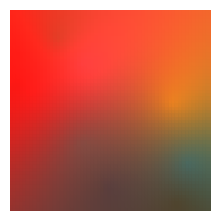

CPU times: total: 35 s
Wall time: 35 s


In [170]:
%%time

def plotcolormap(numdot, lim=2):
    plt.figure(figsize=(2,2))
    for i in np.linspace(-1, 1, numdot):
        for j in np.linspace(-1, 1, numdot):
            plt.plot(i, j, marker = 's', color = colormaping(datacolor, colordict, i, j, lim=lim))
    plt.axis('equal')
    plt.gca().set_axis_off()
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.savefig('cmapgroup.png', bbox_inches='tight', dpi=100)
    plt.show()
plotcolormap(60)

Nous utiliseront ce graphique avec les données de l'éléction présidentielle de 2022, données recoltées et analysées par Science Po.
<img src="doubleaxe.png" width=600>

In [171]:
datacolor=pd.DataFrame({'posx': [-0.9, -0.9, -0.8, -0.75, -0.5, -0.25, -0.25, -0.05, 0, 0.65, 0.8, 0.7],
                        'posy': [0.6, 0.3, 0.5, 0.2, 0.75, 0.5, -0.3, -0.75, -0.75, 0.1, -0.5, -0.9],
                        'color': ['PP', 'NA', 'JM', 'FR', 'YJ', 'AH', 'JL', 'ML', 'ND', 'EM', 'VP', 'EZ'],
                        'poids': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]})

In [172]:
def view3D(angle=45, y=30):
    L = np.linspace(-1, 1, 40)
    X, Y = np.meshgrid(L, L)
    Z = np.zeros((40,40))
    for i in range(datacolor.shape[0]):
        Z += 1/np.exp(((X-datacolor.loc[i, 'posx'])**2 + 
                       (Y-datacolor.loc[i, 'posy'])**2) * 3) * datacolor.loc[i, 'poids'] ** 2
        from ipywidgets import interact, interactive, fixed, interact_manual
    fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})
    ax.view_init(azim=angle, elev=y)
    ax.plot_surface(X, Y, Z, cmap='magma')

interact(view3D, angle=widgets.IntSlider(min=-0, max=360, step=15, value=45), y=widgets.fixed(30))

interactive(children=(IntSlider(value=45, description='angle', max=360, step=15), Output()), _dom_classes=('wi…

<function __main__.view3D(angle=45, y=30)>

In [173]:
colordict = {'PP': '#cf2926',
            'NA': '#9a1915',
            'JM': '#e94243',
            'FR': '#e51a22',
            'YJ': '#3fac40',
            'AH': '#ed668c',
            'JL': '#627b75',
            'ML': '#8e6226',
            'ND': '#223885',
            'EM': '#f9b000',
            'VP': '#1c90c6',
            'EZ': '#664316'}

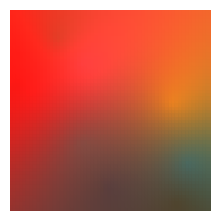

In [174]:
plotcolormap(60)

In [175]:
datacolor=pd.DataFrame({'posx': [-1, -1, -0.5, -0.4, 0, 1, 0.5, 0, 0.5, -0.5, 0, 0.5, -0.5],
                        'posy': [1, 0.5, 1, 0.4, 0, 0, 0, -0.5, -0.5, -0.5, -1, -1, -1],
                        'color': ['EG', 'EG', 'EG', 'S', 'N', 'L', 'L', 'C', 'C', 'C', 'ED', 'ED', 'ED'],
                        'poids': [6, 2, 2, 10, 10, 7, 3, 7, 1.5, 1.5, 5, 2.5, 2.5]})

In [176]:
colordict = {'EG': '#bb0000',
            'S': '#ff8080',
            'N': '#8d2e88',
            'L': '#ffeb00',
            'C': '#0066cc',
            'ED': '#3e2810',
            'A': '#dddddd',
            '': '#ffffff'} 

In [177]:
def meanhex(list):
    array = np.zeros(3)
    for i in list:
        array += hex_to_ints(i)
    return f'#{int_to_16(int(array[0]/len(list)))}{int_to_16(int(array[1]/len(list)))}{int_to_16(int(array[2]/len(list)))}'
        

In [178]:
datagroup['posx'] = [2, -0.6, 0.6, -0.8, 0, 0.8, 0.3, 2, 0.6, -0.05, -0.25]
datagroup['posy'] = [0.15, 0.2, -0.1, 0.5, 0, -0.5, -0.1, 0.15, 0.1, -0.75, 0.5]
c = []
for i in datagroup.loc[:, 'posx']:
    j = datagroup.loc[datagroup['posx']==i, 'posy'].iloc[0]
    if i == 2:
        c += ['#008000']
    else:
        c += [colormaping(datacolor, colordict, i, j, lim=2)]

datagroup['color'] = c
datagroup['union'] = ['NUPES', 'NUPES', 'Ensemble', 'NUPES', 'Autre', 'Les Républicains', 'Ensemble', 'Autre', 'Ensemble', 'Rassemblement National', 'NUPES']
datagroup2 = datagroup.sort_values('posy', ascending=False)
dataunion = pd.merge(datagroup2.groupby('union')['color'].agg(meanhex),
                    datagroup2.groupby('union')['count'].sum(),
                    left_index=True, right_index=True)
dataunion['member'] = ['LIOT NI', 'HOR MODEM REN','LR' , 'SOC GDR LFI ECO', 'RN']
print(dataunion.head())

                          color  count           member
union                                                  
Autre                   #4d4848     29          LIOT NI
Ensemble                #8e634d    250    HOR MODEM REN
Les Républicains        #5c5849     61               LR
NUPES                   #943c37    149  SOC GDR LFI ECO
Rassemblement National  #222d61     88               RN


In [179]:
## Définition d'une fonction qui nous permettra de repartir nos places sur plusieurs rangées
def list_places(places, row=14):
    """
    Listing all coordinates of the places of the assembly

    Parameters:
    ---
    places: int
        Number of places
    row: int, default=14
        Number of row

    Returns:
    ---
    pandas.DataFrame:
        DataFrame containing for each of the places the row, the place in the row, the x axis coordinate and the y axis coordinate
        The DataFrame columns are {'row', 'place', 'posx', 'posy'}
    """
    ## Initialisation des valeurs
    pos = []

    ## Création d'une liste de rayons pour chaque rangée
    radius = np.linspace(0.4, 1, row)

    ## Création d'une liste de places par rangée (qu'on completera sur les dernières rangées)
    places_row = np.linspace(places//row - row - 2, places//row + row + 1, row, dtype = int)
    for miss in range(int(places - places_row.sum())):
        places_row[row - miss -1] += 1

    ## Obtention des coordonnées des places sous la forme d'une liste de liste
    for r in range(row):
        tau = np.linspace(np.pi, 0, int(places_row[r]))
        for i in range(int(places_row[r])):
            ## Chaque liste contiendra : le numero de la rangée
            ## Le numero du siege de la rangée
            ## les coordonées en abscisse, puis en ordonné
            pos += [[i+1, r+1, radius[r]*np.cos(tau[i]), radius[r]*np.sin(tau[i])]]
            
    return pd.DataFrame(pos, columns=['row', 'place', 'posx', 'posy'])

In [180]:
def plot_halfscatterpie(data, row=14):
    """
    Plot a half pie chart composed of scattered dots

    Parameters
    ---
    data: pandas.DataFrame
        DataFrame you want to plot
    row: int, default=14
        Number of row to plot
    """
    ## Initialisation du graphique
    fig, ax=plt.subplots()
    ax.axis('equal')
    ax.set_axis_off()

    ## Recuperation de la répartition des places dans le graphique
    pos = list_places(data.shape[0], row)

    ## Placement des points dans le graphique
    for i in data.index:
       ax.plot(pos.loc[i, 'posx'], pos.loc[i, 'posy'], 'o',
               c=dataunion.loc[dataunion['member'].str.contains(data.loc[i, 'groupe_sigle']), 'color'].iloc[0],
               markersize=5)
        
    ## Affichage de la légende
    ax.legend(datagroup.index + ' - ' + datagroup['groupe_name'], loc=(1.1, 0.18))
    ax.set_title("Representation de l'assemblé nationale au 9 juin 2024 en France")

    ## Affichage du total de siège
    ax.text(x=0, y=0.15, s=f"Total :\n {data.shape[0]} sièges",
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=15)

    ## Affichage du graphique
    plt.show()

In [181]:
pos = list_places(577, 14)
pos

,row,place,posx,posy
0,1,1,-0.400000,4.898587e-17
1,2,1,-0.396846,5.013329e-02
2,3,1,-0.387433,9.947595e-02
3,4,1,-0.371911,1.472498e-01
4,5,1,-0.350523,1.927015e-01
...,...,...,...,...
572,54,14,0.975796,2.186811e-01
573,55,14,0.986361,1.645946e-01
574,56,14,0.993931,1.100082e-01
575,57,14,0.998482,5.508776e-02


In [182]:
data_now

,index,id,nom,nom_de_famille,prenom,sexe,groupe_sigle,parti_ratt_financier
0,431,432,Nicolas Thierry,Thierry,Nicolas,H,ECO,Europe Écologie Les Verts
1,41,42,Jérémie Iordanoff,Iordanoff,Jérémie,H,ECO,Europe Écologie Les Verts
2,358,359,Delphine Batho,Batho,Delphine,F,ECO,Europe Écologie Les Verts
3,240,241,Karim Ben Cheikh,Ben Cheikh,Karim,H,ECO,Europe Écologie Les Verts
4,236,237,Sophie Taillé-Polian,Taillé-Polian,Sophie,F,ECO,Europe Écologie Les Verts
...,...,...,...,...,...,...,...,...
572,341,342,Claudia Rouaux,Rouaux,Claudia,F,SOC,Parti socialiste
573,346,347,Elie Califer,Califer,Elie,H,SOC,Parti progressiste démocratique guadeloupéen
574,78,79,Anna Pic,Pic,Anna,F,SOC,Parti socialiste
575,137,138,Fatiha Keloua Hachi,Keloua Hachi,Fatiha,F,SOC,Parti socialiste


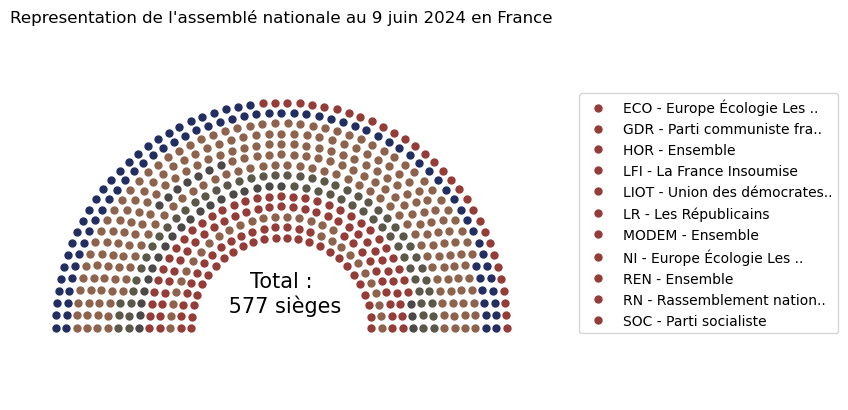

In [183]:
plot_halfscatterpie(data_now, 14)

## Etape 4 : Généralisation de chaque graphique